This notebook loads the distribution of TP detections of a time segmenter model and plots the histogram of the proportion of TP depending of the time residual of the detection with respect of the ground truth.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter

matplotlib.rcParams.update({'font.size': 15})  # font size of matplotlib figure

## Load TP detections per time residual for both test datasets

In [2]:
TP_by_distance_hyd = np.load("../../../../../data/npy/TiSSNet/HYDROMOMAR/TP_by_distance.npy")
TP_by_distance_oha = np.load("../../../../../data/npy/TiSSNet/OHASISBIO/TP_by_distance.npy")

## Plot the figure

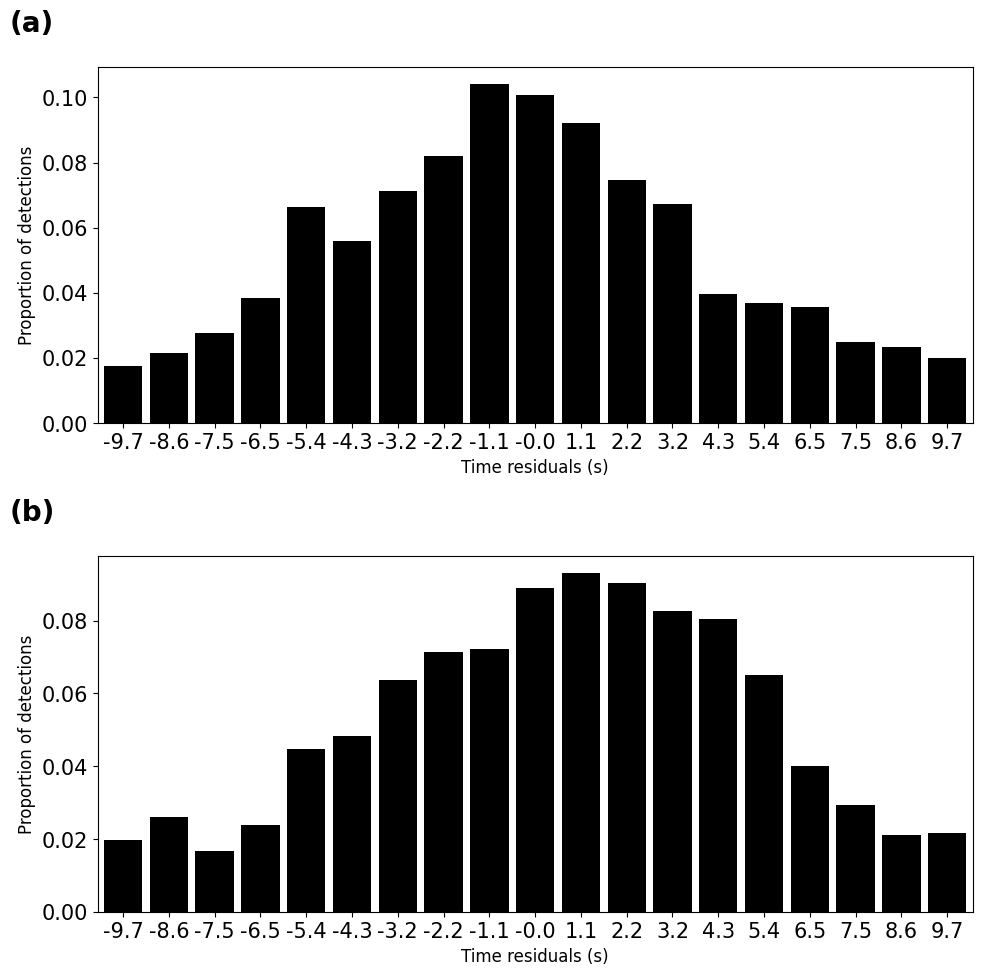

In [4]:
BAR_WIDTH = 0.9
step = 2*100/186  # number of seconds corresponding to 2 time bins in the data
extremum = step * np.round(10 / step)  # we allow +/- 10s of time residual at maximum
allowed_d = np.arange(-extremum, extremum+step, step)

plt.subplots(2, 1, figsize=(10,10))

# OHASISBIO-2020
ax1 = plt.subplot(2, 1, 1)

plt.bar(allowed_d, TP_by_distance_oha, width=BAR_WIDTH, align='center', color='black')
plt.xticks(allowed_d)
plt.xlim(allowed_d[0]-0.5-(1-BAR_WIDTH), allowed_d[-1]+0.5+(1-BAR_WIDTH))
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# subfigure index
ax1.text(-0.1, 1.1, "(a)", transform=ax1.transAxes, size=20, weight='bold')

plt.xlabel('Time residuals (s)', fontsize=12)
plt.ylabel('Proportion of detections', fontsize=12)

# HYDROMOMAR
ax2 = plt.subplot(2, 1, 2)

plt.bar(allowed_d, TP_by_distance_hyd, width=BAR_WIDTH, align='center', color='black')
plt.xticks(allowed_d)
plt.xlim(allowed_d[0]-0.5-(1-BAR_WIDTH), allowed_d[-1]+0.5+(1-BAR_WIDTH))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax2.text(-0.1, 1.1, "(b)", transform=ax2.transAxes, size=20, weight='bold')  # subfigure index

plt.xlabel('Time residuals (s)', fontsize=12)
plt.ylabel('Proportion of detections', fontsize=12)

plt.tight_layout()

plt.savefig("../../../../../data/figures/TiSSNet/histograms_merged.png", dpi=200)